# k-Means

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
def findClosestCentroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    for i in range(m):
        x = X[i, :]
        a = centroids-x
        a = np.sum(a*a, axis=1)
        idx[i] = np.where(np.min(a)==a)[0][0]
    return idx


In [3]:
data = sio.loadmat('Practice\Machine Learning\machine-learning-ex7\ex7\ex7data1.mat')
X = data['X']
initialCentroids = np.array([[2, 4], [4, 6], [6, 5]])
idx = findClosestCentroids(X, initialCentroids)
# idx= idx.ravel()

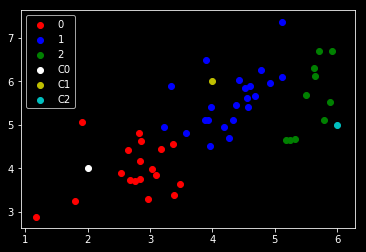

In [4]:
# Visualizing Assigned closest centroids
fig, ax = plt.subplots(1)

ax.scatter(X[idx==0, 0], X[idx==0, 1], c='r', label='0')
ax.scatter(X[idx==1, 0], X[idx==1, 1], c='b', label='1')
ax.scatter(X[idx==2, 0], X[idx==2, 1], c='g', label='2')
ax.scatter(initialCentroids[0, 0], initialCentroids[0, 1], c='w', label='C0')
ax.scatter(initialCentroids[1, 0], initialCentroids[1, 1], c='y', label='C1')
ax.scatter(initialCentroids[2, 0], initialCentroids[2, 1], c='c', label='C2')
ax.legend()
plt.show()

In [5]:
def computeCentroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for i in range(K):
        centroids[i] = np.mean(X[idx==i], axis=0)
    return centroids


In [6]:
centroids = computeCentroids(X, idx, 3)

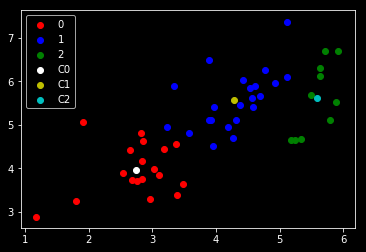

In [7]:
# Visualizing shifted centroids to their mean
fig, ax = plt.subplots(1)

ax.scatter(X[idx==0, 0], X[idx==0, 1], c='r', label='0')
ax.scatter(X[idx==1, 0], X[idx==1, 1], c='b', label='1')
ax.scatter(X[idx==2, 0], X[idx==2, 1], c='g', label='2')
ax.scatter(centroids[0, 0], centroids[0, 1], c='w', label='C0')
ax.scatter(centroids[1, 0], centroids[1, 1], c='y', label='C1')
ax.scatter(centroids[2, 0], centroids[2, 1], c='c', label='C2')
ax.legend()
plt.show()

In [8]:
delta = initialCentroids-centroids
K = 3
i = 0
while(np.sum(delta)):
    i += 1
    idx = findClosestCentroids(X, centroids)
    c = computeCentroids(X, idx, K)
    delta = centroids-c
    centroids=c
print('No of iterations: ', i)

No of iterations:  3


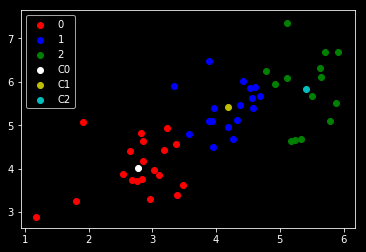

In [9]:
# Visualizing final centroids
fig, ax = plt.subplots(1)

ax.scatter(X[idx==0, 0], X[idx==0, 1], c='r', label='0')
ax.scatter(X[idx==1, 0], X[idx==1, 1], c='b', label='1')
ax.scatter(X[idx==2, 0], X[idx==2, 1], c='g', label='2')
ax.scatter(centroids[0, 0], centroids[0, 1], c='w', label='C0')
ax.scatter(centroids[1, 0], centroids[1, 1], c='y', label='C1')
ax.scatter(centroids[2, 0], centroids[2, 1], c='c', label='C2')
ax.legend()
plt.show()

In [11]:
print(centroids)

[[2.7692839  4.02273777]
 [4.18165845 5.40930856]
 [5.41133402 5.83928781]]
